In [116]:
import numpy as np
import pandas as pd

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [118]:
train=pd.read_csv(r'C:\Users\kinja\Documents\titanic\train2.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


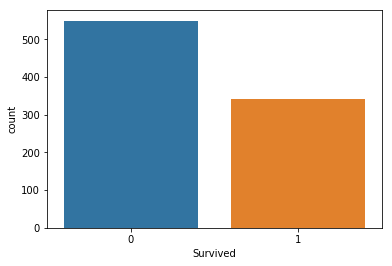

In [120]:
sns.countplot(x='Survived', data=train)

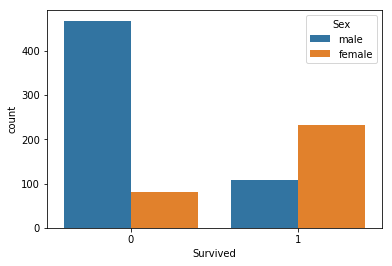

In [121]:
sns.countplot(x='Survived',hue='Sex', data=train)

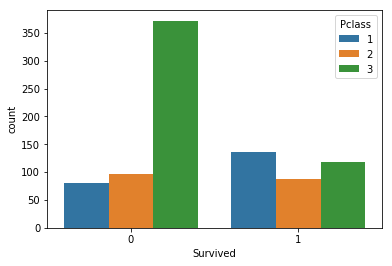

In [122]:
sns.countplot(x='Survived',  hue='Pclass', data=train)

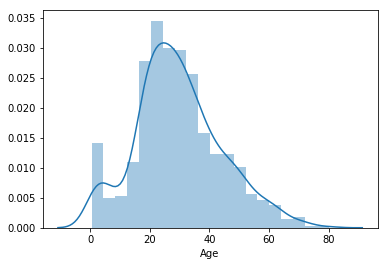

In [123]:
sns.distplot(train['Age'].dropna())

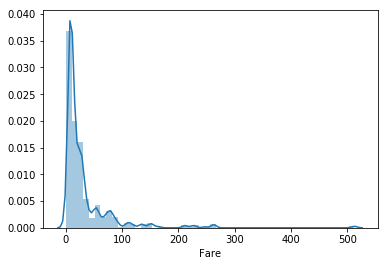

In [124]:
sns.distplot(train['Fare'].dropna())

In [125]:
train['Age'].fillna(train.Age.mean(),inplace=True)

In [126]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
train['Cabin']=train.Cabin.apply(clean_cabin)

train.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

categorical_variables=['Sex', 'Cabin', 'Embarked']
for variable in categorical_variables:
    train[variable].fillna("Missing", inplace=True)
    dummies=pd.get_dummies(train[variable], prefix=variable) 
    train=pd.concat([train, dummies], axis=1)
    train.drop([variable], axis=1, inplace=True)



In [128]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_None', 'Cabin_T', 'Embarked_C',
       'Embarked_Missing', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

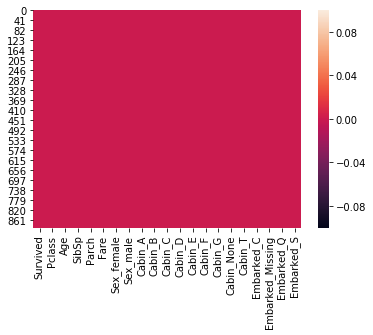

In [129]:
sns.heatmap(train.isnull())

In [130]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
train=scalar.fit_transform(train)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=42)



AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [134]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
445,1,4.000000,0,2,81.8583,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
650,3,29.699118,0,0,7.8958,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
172,3,1.000000,1,1,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
450,2,36.000000,1,2,27.7500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
314,2,43.000000,1,1,26.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
332,1,38.000000,0,1,153.4625,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
801,2,31.000000,1,1,26.2500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
90,3,29.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
834,3,18.000000,0,0,8.3000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
181,2,29.699118,0,0,15.0500,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [135]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.79      0.72      0.75       111

avg / total       0.81      0.81      0.80       268

